### INTRODUCTION TO CUSTOMER SEGMENTATION -- RFM

<strong>What is Customer Segmentation ? </strong>

Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics.The market researcher can segment customers into the B2C model using various customer's demographic characteristics such as occupation, gender, age, location, and marital status. Psychographic characteristics such as social class, lifestyle and personality characteristics and behavioral characteristics such as spending, consumption habits, product/service usage, and  previously purchased products. In the B2B model using various company's characteristics such as the size of the company, type  of industry, and location.

<strong>Need of Customer Segmentation</strong>
<ol>
<li>It will help in identifying the most potential customers.</li>
<li>It will help managers to easily communicate with a targetted group of the audience.</li>
<li>Also, help in selecting the best medium for communicating with the targetted segment.</li>
<li>It improves the quality of service, loyalty, and retention.</li>
<li>Improve customer relationship via better understanding needs of segments.</li>
<li>It provides opportunities for upselling and cross-selling.</li>
<li>It will help managers to design special offers for targetted customers, to encourage them to buy more products.</li>
<li>It helps companies to stay a step ahead of competitors.</li>
<li>It also helps in identifying new products that customers could be interested in.</li>
</ol>


In [ ]:
from IPython.core.display import Image, display
Image("C:/Users/haren/OneDrive/Desktop/movies/types_of_segmentation.png", width=800, unconfined=True)

### Customer Segmentation using RFM analysis
RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

<ul>
<li>Recency (R): Who have purchased recently? Number of days since last purchase (least recency)</li>
<li>Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)</li>
<li>Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)</li>
</ul>

Here, Each of the three variables(Recency, Frequency, and Monetary) consists of four equal groups, which creates 64 (4x4x4) different customer segments.

Steps of RFM(Recency, Frequency, Monetary):

<ol>
    <li>Calculate the Recency, Frequency, Monetary values for each customer.</li>
    <li>Add segment bin values to RFM table using quartile.</li>
    <li>Sort the customer RFM score in ascending order.</li>
</ol>

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/haren/Downloads/retail/online.csv', engine = 'python')

In [3]:
data.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country
0,1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,2,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 9 columns):
Unnamed: 0     541910 non-null int64
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null object
Price          541910 non-null float64
Customer.ID    406830 non-null float64
Country        541910 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [5]:
filtered_data = data[['Customer.ID','Country']].drop_duplicates()
filtered_data.shape

(4389, 2)

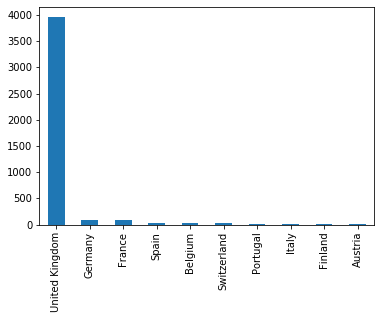

In [6]:
#Top ten Countries
filtered_data['Country'].value_counts()[:10].plot(kind='bar')

In [7]:
# Since Most of the customers are from United Kingdom , therefore will filter the data for  United Kingdom only

In [8]:
uk_data=data[data.Country == 'United Kingdom']

<i>The describe() function in pandas is convenient in getting various summary statistics. This function returns the 
count, mean, standard deviation, minimum and maximum values and the quantiles of the data </i>

In [9]:
uk_data.drop('Unnamed: 0', axis=1,inplace=True)
uk_data.describe()

C:\Users\haren\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Quantity,Price,Customer.ID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# Here we can observe that some customer have negative ordered quantity, which is not possible

In [10]:
uk_data = uk_data[uk_data.Quantity >0]

In [11]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
Invoice        486286 non-null object
StockCode      486286 non-null object
Description    485694 non-null object
Quantity       486286 non-null int64
InvoiceDate    486286 non-null object
Price          486286 non-null float64
Customer.ID    354345 non-null float64
Country        486286 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.4+ MB


In [12]:
# filter required columns

In [13]:
uk_data = uk_data[['Customer.ID','Invoice','InvoiceDate','Quantity','Price']]

In [14]:
uk_data['Total_Price']= uk_data['Quantity']*uk_data['Price']

In [15]:
uk_data['InvoiceDate']= pd.to_datetime(uk_data['InvoiceDate'])

In [16]:
uk_data['InvoiceDate'].min() , uk_data['InvoiceDate'].max()

(Timestamp('2010-01-12 08:26:00'), Timestamp('2011-12-10 17:19:00'))

In [17]:
uk_data.head(10)

,Customer.ID,Invoice,InvoiceDate,Quantity,Price,Total_Price
0,17850.0,536365,2010-01-12 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-01-12 08:26:00,6,3.39,20.34
2,17850.0,536365,2010-01-12 08:26:00,8,2.75,22.00
3,17850.0,536365,2010-01-12 08:26:00,6,3.39,20.34
4,17850.0,536365,2010-01-12 08:26:00,6,3.39,20.34
5,17850.0,536365,2010-01-12 08:26:00,2,7.65,15.30
6,17850.0,536365,2010-01-12 08:26:00,6,4.25,25.50
7,17850.0,536366,2010-01-12 08:28:00,6,1.85,11.10
8,17850.0,536366,2010-01-12 08:28:00,6,1.85,11.10
9,13047.0,536368,2010-01-12 08:34:00,6,4.25,25.50


RFM Analysis
Here, you are going to perform following opertaions:
<ul>
<li>For Recency, Calculate the number of days between present date and date of last purchase each customer.</li>
<li>For Frequency, Calculate the number of orders for each customer.</li>
<li>For Monetary, Calculate sum of purchase price for each customer.</li>
</ul>

In [18]:
import datetime as dt

In [19]:
Present = dt.datetime(2011,12,10)

In [22]:
rfm = uk_data.groupby('Customer.ID').agg({'InvoiceDate': lambda date: (Present - date.max()).days,
                                         'Invoice': lambda num:len(num),
                                         'Total_Price':  lambda price : price.sum()})

In [23]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'Total_Price'], dtype='object')

In [28]:
rfm.columns=['monetary','recency','frequency']

In [29]:
rfm['recency']=rfm['recency'].astype(int)

In [30]:
rfm.head()

,monetary,recency,frequency
Customer.ID,,,
12346.0,325,1,77183
12747.0,22,103,4196
12748.0,4,4596,33719
12749.0,22,199,4090
12820.0,44,59,942


Computing Quantile of RFM values
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values 
for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [32]:
rfm['r_quartile']= pd.qcut(rfm['recency'],4,labels=['1','2','3','4'])
rfm['f_quartile']=pd.qcut(rfm['frequency'],4,labels=['1','2','3','4'])
rfm['m_quartile']=pd.qcut(rfm['monetary'],4,labels=['1','2','3','4'])

In [33]:
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile
Customer.ID,,,,,,
12346.0,325,1,77183,1,4,4
12747.0,22,103,4196,4,4,2
12748.0,4,4596,33719,4,4,1
12749.0,22,199,4090,4,4,2
12820.0,44,59,942,3,3,2


### RFM Result Interpretatimon
Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the 
customers well group.

In [35]:
rfm['RFM_score']=rfm.r_quartile.astype(str)+rfm.f_quartile.astype(str)+rfm.m_quartile.astype(str)
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_score
Customer.ID,,,,,,,
12346.0,325,1,77183,1,4,4,144
12747.0,22,103,4196,4,4,2,442
12748.0,4,4596,33719,4,4,1,441
12749.0,22,199,4090,4,4,2,442
12820.0,44,59,942,3,3,2,332


In [39]:
# Filter out the top/best customer
rfm[rfm['RFM_score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_score
Customer.ID,,,,,,,
17163.0,21,5,293,1,1,1,111
13962.0,21,11,169,1,1,1,111
13079.0,21,6,220,1,1,1,111
14793.0,21,14,228,1,1,1,111
17650.0,21,8,166,1,1,1,111
